### Note:
The purpose of this notebooks is to take a look at some preprocessing.  Specifically, that of VGG16.

In [1]:
# Appropriate Imports:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.applications import vgg16

In [2]:
# Setting Globals:
source_directory = '/Users/johnmays/Documents/Wirth Lab/still_data/Post-Hinc_small_dasets/Post-Hinc_256_256/01/'

### Previewing a few images

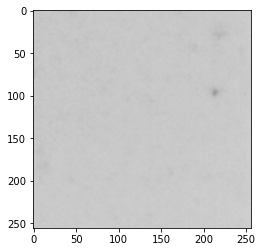

080521_image__10_256_cropped_90_15.tif
Norm: 51329.28171131951


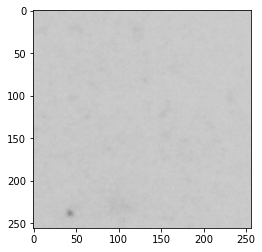

080921_image__55_256_cropped_180_17.tif
Norm: 51265.84292684556


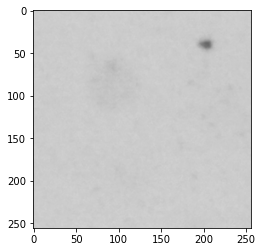

080921_image__92_256_cropped_0_8.tif
Norm: 51894.77254984359


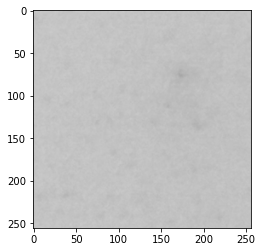

080521_image__10_256_cropped_180_1.tif
Norm: 49628.14201640033


In [3]:
os.chdir(source_directory)
filenames = os.listdir(source_directory)
for i in range(4):
    filename = filenames[i]
    img = imread(filename)
    img = np.array(img)
    plt.imshow(img)
    plt.show()
    imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/3
    # imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/((3/4)*np.size(img))
    print(filename)
    print("Norm: " + str(imnorm))

### Seeing what they look like with VGG16 preprocessing:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


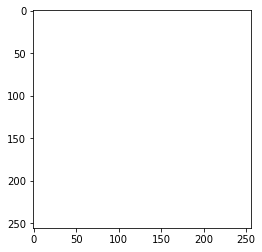

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


080521_image__10_256_cropped_90_15.tif
Norm: 26595.341145833332


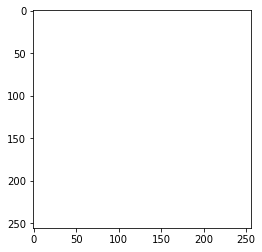

080921_image__55_256_cropped_180_17.tif
Norm: 26553.5703125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


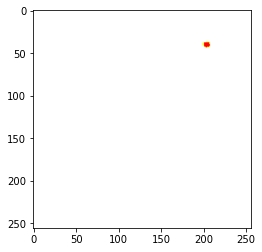

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


080921_image__92_256_cropped_0_8.tif
Norm: 26978.973958333332


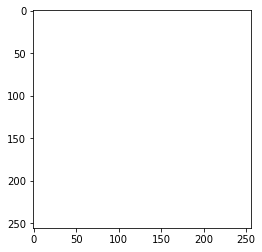

080521_image__10_256_cropped_180_1.tif
Norm: 25463.361979166668


In [4]:
os.chdir(source_directory)
filenames = os.listdir(source_directory)
for i in range(4):
    filename = filenames[i]
    img = imread(filename)
    img = vgg16.preprocess_input(img)
    plt.imshow(img)
    plt.show()
    imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/3
    # imnorm = (np.linalg.norm(x=img[:, :, 0], ord='fro') + np.linalg.norm(x=img[:, :, 1], ord='fro') + np.linalg.norm(x=img[:, :, 2], ord='fro'))/((3/4)*np.size(img))
    print(filename)
    print("Norm: " + str(imnorm))

In [5]:
def highlight_blank_pixels(img, thresh=(1.0, 1.0, 1.0)):
    for i in range(len(img[0, :, 0])):
        for j in range(len(img[:, 0, 0])):
            if img[i][j][0] >= thresh[0] and img[i][j][1] >= thresh[1] and img[i][j][2] >= thresh[2]:
                img[i][j][0] = 0
                img[i][j][1] = 0
                img[i][j][2] = 0
            # in other words, if a pixel is white, make it black
    return img

### How much information is being lost through VGG16 preprocessing?
Here, I've turned any pixel that is totally white into a pixel that is totally black to highlight information loss:

Original Image:


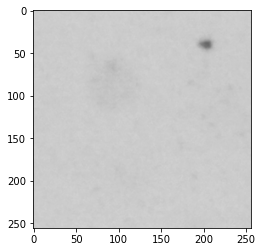

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Post-processing:


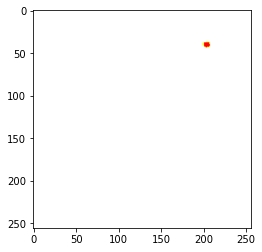

After scanning for white pixels:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


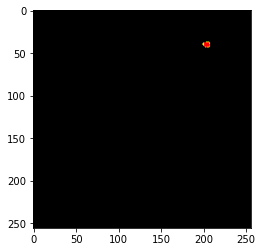

In [6]:
print("Original Image:")
img1 = imread('080921_image__92_256_cropped_0_8.tif')
plt.imshow(img1)
plt.show()

print("Post-processing:")
img1 = vgg16.preprocess_input(img1)
plt.imshow(img1)
plt.show()

print("After scanning for white pixels:")
img1 = highlight_blank_pixels(img1)
plt.imshow(img1)
plt.show()

#### Conclusion: VGG16 preprocessing is likely useless

Just for fun:

In [7]:
img = preprocessing.image.load_img('080921_image__92_256_cropped_0_8.tif', target_size=(224, 224))
img = preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)

model = vgg16.VGG16()

In [8]:
from keras.applications.vgg16 import decode_predictions
features = model.predict(img)
# convert the probabilities to class labels
# label = decode_predictions(features)
# retrieve the most likely result, e.g. highest probability
# label = label[0][0]
# print the classification
# print(label[1])

Using TensorFlow backend.
